In [31]:
%run web_scrapingcopy.ipynb

In [32]:
import chart_studio.plotly as py
import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True) 

In [33]:
#some imports
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
cf.go_offline()
%matplotlib inline

In [34]:
#Active cases column
complete_data['Active']=complete_data['Total Confirmed cases']-complete_data['Death']-complete_data['Cured/Discharged/Migrated']

In [35]:
ab=complete_data[['Date','Total Confirmed cases','Death','Cured/Discharged/Migrated','Active']].groupby(by=['Date']).sum()
ab.iplot(kind='line',xTitle='Date',yTitle='Count',fill=True)

In [36]:
from datetime import date
latest_data=complete_data[complete_data['Date'].apply( lambda x:x==date.today())]

In [37]:
#state wise count in barplot
latest_data.iplot(kind='bar',x='Name of State / UT',y='Total Confirmed cases',colors='green',xTitle='States/UT',yTitle='Count',title='State wise count')

In [38]:
import plotly.graph_objects as go
plt.figure(figsize=(10,10))
dz=[]
for x in ['Active','Death','Cured/Discharged/Migrated']:
    dz.append(latest_data[x].sum())

fig = go.Figure(data=[go.Pie(labels=['Active','Death','Cured/Discharged/Migrated'], values=dz, hole=.5,title='Out of total confirmed cases')])
fig.show()

<Figure size 720x720 with 0 Axes>

In [39]:
import geopandas as gpd
map_data = gpd.read_file('Indian_States.shp')
#map_data.rename(columns = {‘st_nm’:’States/UT’}, inplace = True)
#map_data.head(1)

In [40]:
#df_bs['Name of State / UT'].head(37)

In [41]:
map_data['st_nm'] = map_data['st_nm'].str.replace('&','and')
map_data['st_nm'].replace('Arunanchal Pradesh',
                              'Arunachal Pradesh', inplace = True)
map_data['st_nm'].replace('Telangana', 
                              'Telengana', inplace = True)
map_data['st_nm'].replace('NCT of Delhi', 
                              'Delhi', inplace = True)
map_data['st_nm'].replace('Andaman and Nicobar Island', 
                              'Andaman and Nicobar Islands', 
                               inplace = True)
map_data['st_nm'].replace('Dadara and Nagar Havelli', 
                              'Dadar Nagar Haveli', 
                               inplace = True)
map_data['Name of State / UT']=map_data['st_nm']
map_data.drop(['st_nm'],axis=1,inplace=True)
#map_data.head(2)

In [42]:
merged_data = pd.merge(map_data, latest_data, 
                       how = 'left', on = 'Name of State / UT')
#merged_data.fillna(0, inplace = True)
merged_data.drop('Unnamed: 0', axis = 1, inplace = True)
#merged_data.dropna()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\colors.py:527: RuntimeWarning:

invalid value encountered in less



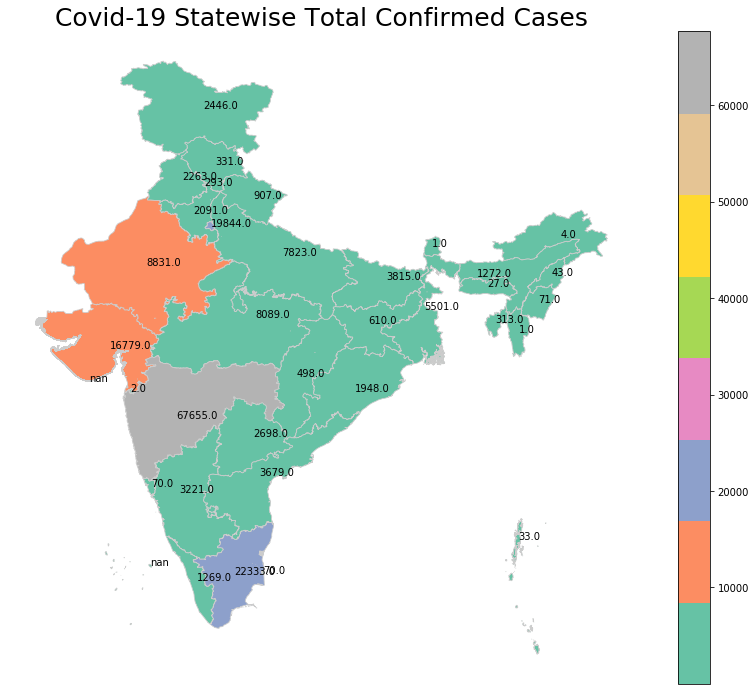

In [26]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(15,12))
ax.axis('off')
ax.set_title('Covid-19 Statewise Total Confirmed Cases', 
             fontdict =  {'fontsize': '25', 'fontweight' : '3'})
merged_data.plot(column = 'Total Confirmed cases', cmap='Set2', 
                 linewidth=0.8, ax=ax, edgecolor='0.8', 
                 legend = True)
merged_data['coords'] = merged_data['geometry'].apply(lambda x: x.representative_point().coords[:])
merged_data['coords'] = [coords[0] for coords in merged_data['coords']]
for idx, row in merged_data.iterrows():
    plt.annotate(xy=row['coords'],s=row['Total Confirmed cases'])

plt.show()